In [22]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(xtrain,ytrain),(xtest,ytest) = datasets.cifar10.load_data()

In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
ytrain.shape

(50000, 1)

In [5]:
ytrain[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [6]:
ytrain=ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
classes=["airplane","autombile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

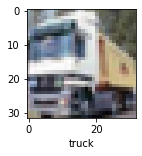

In [20]:
plot_sample(xtrain,ytrain,1)

In [24]:
xtrain=xtrain/255
xtest=xtest/255

In [25]:
#model building

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


#compiling model

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#fitting the model

model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8137 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6215 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5409 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4814 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4318 - accuracy: 0.4964


In [26]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 4s 10ms/step - loss: 1.5036 - accuracy: 0.4624


[1.5036245584487915, 0.46239998936653137]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
ypred=model.predict(xtest)
ypred_classes= [np.argmax(element) for element in ypred]
print("classification report : ")
print(classification_report(ytest,ypred_classes))

313/313 [==============================] - 3s 9ms/step
classification report : 
              precision    recall  f1-score   support

           0       0.68      0.37      0.48      1000
           1       0.53      0.69      0.60      1000
           2       0.39      0.25      0.30      1000
           3       0.35      0.36      0.36      1000
           4       0.60      0.15      0.25      1000
           5       0.51      0.24      0.32      1000
           6       0.31      0.84      0.45      1000
           7       0.52      0.55      0.54      1000
           8       0.57      0.68      0.62      1000
           9       0.63      0.49      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



# Convolutional Neural Network

In [ ]:
cnn=keras.Sequential([
    
    #cnn
    layers.Conv2D(filters=32,kernal_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64,kernal_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    
    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [32]:
cnn.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#fitting the model

cnn.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2898 - accuracy: 0.5466
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2562 - accuracy: 0.5599
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2272 - accuracy: 0.5695
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1989 - accuracy: 0.5810
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1709 - accuracy: 0.5906
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1421 - accuracy: 0.6020
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1166 - accuracy: 0.6101
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0882 - accuracy: 0.6220
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0647 - accuracy: 0.6294
Epoch 10/10
1563/1563 [==============================] - 57s 36m

In [34]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 3s 9ms/step - loss: 1.4261 - accuracy: 0.4964


[1.4260821342468262, 0.49639999866485596]

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
ypred=cnn.predict(xtest)
ypred_classes= [np.argmax(element) for element in ypred]
print("classification report : ")
print(classification_report(ytest,ypred_classes))

313/313 [==============================] - 3s 9ms/step
classification report : 
              precision    recall  f1-score   support

           0       0.66      0.47      0.55      1000
           1       0.83      0.36      0.50      1000
           2       0.33      0.64      0.44      1000
           3       0.39      0.30      0.34      1000
           4       0.52      0.39      0.45      1000
           5       0.42      0.47      0.44      1000
           6       0.75      0.38      0.50      1000
           7       0.53      0.67      0.60      1000
           8       0.81      0.47      0.60      1000
           9       0.42      0.80      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.57      0.50      0.50     10000
weighted avg       0.57      0.50      0.50     10000

